In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_csv(filepath_or_buffer = "/users/Liz/Downloads/samsung.csv")
datos.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [4]:
print("Columnas del DataFrame:", datos.columns.tolist())

Columnas del DataFrame: ['Date', 'Close', 'Volume']


In [5]:
print(datos.head())

         Date  Close    Volume
0  02/01/2008  10880  18047200
1  03/01/2008  10920  19346500
2  04/01/2008  10780  17997350
3  07/01/2008  10380  39787200
4  08/01/2008  10320  24783700


In [6]:
print(datos.isnull().sum())

Date      0
Close     0
Volume    0
dtype: int64


In [8]:
try:
    datos['Date'] = pd.to_datetime(datos['Date'], format='%d/%m/%Y')
except KeyError:
    print("Error: La columna 'Date' no existe. Verifica los nombres de las columnas.")
datos = datos[['Close', 'Volume']]
datos.dropna(inplace=True)


Error: La columna 'Date' no existe. Verifica los nombres de las columnas.


In [10]:
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos)

In [11]:
modelo = KMeans(n_clusters=3, random_state=42, n_init=10)
modelo.fit(datos_scaled)
datos['Cluster'] = modelo.labels_

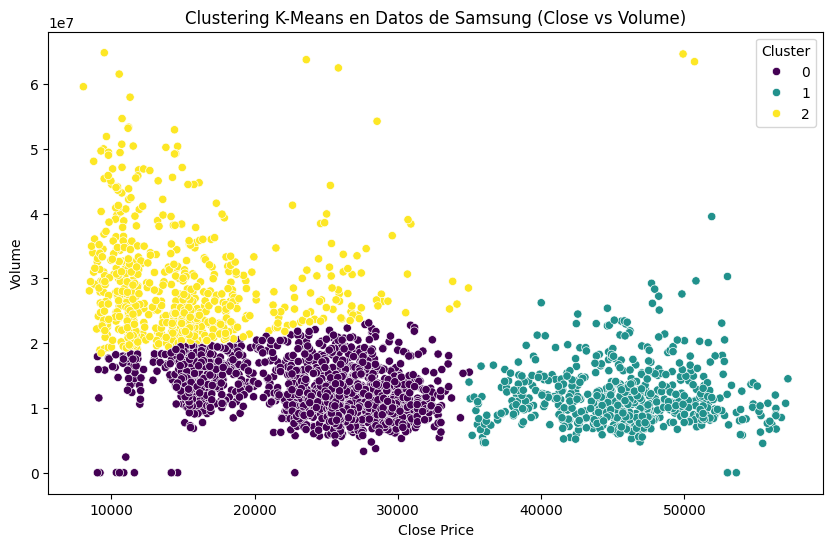

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos['Close'], y=datos['Volume'], hue=datos['Cluster'], palette='viridis')
plt.title('Clustering K-Means en Datos de Samsung (Close vs Volume)')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()